In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt  # for 畫圖用
import pandas as pd

In [2]:
dataset = pd.read_csv('./2330.TW.csv')  # 讀取訓練集

n = 1020
epochs_time = 5
rolling_time = 1
dataset_train = dataset.iloc[:n]
dataset_test = dataset.iloc[n:]

In [25]:
dataset_train

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2016-01-04,120.92,121.77,117.95,118.37,39169000,0.0,0
1,2016-01-05,117.95,118.80,116.25,117.10,46381000,0.0,0
2,2016-01-06,117.10,117.10,114.55,114.98,53617000,0.0,0
3,2016-01-07,114.13,114.55,110.73,112.86,62539000,0.0,0
4,2016-01-08,112.01,114.55,112.01,113.70,50123000,0.0,0
5,2016-01-11,112.86,114.13,110.73,112.86,48345000,0.0,0
6,2016-01-12,112.86,113.70,111.58,112.86,34688000,0.0,0
7,2016-01-13,113.28,114.98,112.86,113.28,37717000,0.0,0
8,2016-01-14,110.73,112.01,110.73,111.58,39253000,0.0,0
9,2016-01-15,116.67,117.10,114.98,116.25,79464000,0.0,0


In [3]:
training_set = dataset_train.iloc[:, 1:2].values  # 取「Open」欄位值
real_stock_price = dataset_test.iloc[:, 1:2].values

Reshape
因為現在 X_train 是 2-dimension，將它 reshape 成 3-dimension: [stock prices, timesteps, indicators]

input_shape是輸入資料格式，LSTM 層輸入格式: 為矩陣,矩陣內容 [ samples, time steps, features ] samples:觀測值，time steps:對於給定的觀測值,給定變數有單獨的時間步--就是時間視窗 features:在得到觀測值的時刻,觀測到的單獨的 measures--就是列數(屬性個數)

In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []   #預測點的前 rolling_time 天的資料
y_train = []   #預測點
for i in range(rolling_time, len(dataset_train)):
    X_train.append(training_set_scaled[i-rolling_time:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array的格式，以利輸入 RNN

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

搭建 LSTM layer:
units: 神經元的數目
第一層的 LSTM Layer 記得要設定input_shape參數
搭配使用dropout，這裡設為 0.2
由於這邊的第四層 LSTM Layer 即將跟 Ouput Layer 做連接，因此注意這邊的 return_sequences 設為預設值 False （也就是不用寫上 return_sequences）

In [5]:
# Import the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
# regressor.add(Dropout(0.2))

Using TensorFlow backend.
W0614 01:28:47.863040 139783298201408 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0614 01:28:47.876860 139783298201408 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0614 01:28:47.881998 139783298201408 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0614 01:28:48.051888 139783298201408 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:136: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instea

In [6]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [7]:
# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 進行訓練
regressor.fit(X_train, y_train, epochs = epochs_time, batch_size = 32)

W0614 01:28:48.689773 139783298201408 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0614 01:28:48.959647 139783298201408 deprecation.py:323] From /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0614 01:28:51.330338 139783298201408 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1021: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
1019/1019 [==============================] - 3s 3ms/step - loss: 0.1621
Epoch 2/5
1019/1019 [==============================] - 0s 201us/step - loss: 0.0433
Epoch 3/5
1019/1019 [==============================] - 0s 193us/step - loss: 0.0264
Epoch 4/5
1019/1019 [==============================] - 0s 201us/step - loss: 0.0111
Epoch 5/5
1019/1019 [==============================] - 0s 201us/step - loss: 0.0043


In [8]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - rolling_time:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs) # Feature Scaling

In [9]:
X_test = []
for i in range(rolling_time, len(real_stock_price)+rolling_time):
    X_test.append(inputs[i-rolling_time:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  # Reshape 成 3-dimension

In [10]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  # to get the original scale

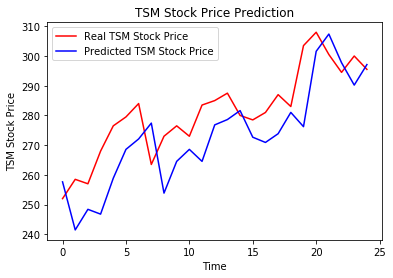

In [11]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TSM Stock Price')  # 紅線表示真實股價
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TSM Stock Price')  # 藍線表示預測股價
plt.title('TSM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TSM Stock Price')
plt.legend()
plt.show()

In [12]:
Predicted_future_list = []
for i in range(n):
    Predicted_future_list.append([np.nan])

for i in predicted_stock_price:
    Predicted_future_list.append(list(i))

In [13]:
dataset_all = dataset.iloc[:, 1:2].values  

In [14]:
inputs = dataset_all.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(rolling_time, len(dataset_all)):
    X_test.append(inputs[i-rolling_time:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_train_stock1_price = regressor.predict(X_test)
predicted_train_stock1_price = sc.inverse_transform(predicted_train_stock1_price)


In [15]:
Predicted_before_list = []
for i in range(rolling_time):
    Predicted_before_list.append([np.nan])

for i in predicted_train_stock1_price:
    Predicted_before_list.append(list(i))

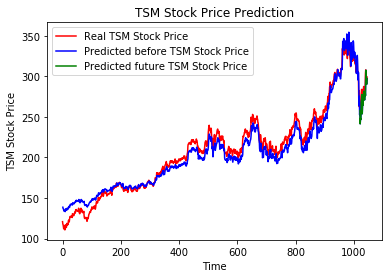

In [16]:
plt.plot(dataset_all, color = 'red', label = 'Real TSM Stock Price')  # 紅線表示真實股價
plt.plot(Predicted_before_list, color = 'blue', label = 'Predicted before TSM Stock Price')  # 藍線表示預測股價
plt.plot(Predicted_future_list, color = 'green', label = 'Predicted future TSM Stock Price')  # 藍線表示預測股價


plt.title('TSM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TSM Stock Price')
plt.legend()
plt.show()